
# **MIS710 Lab 6 Week 6: Solution**
Author: Associate Professor Lemai Nguyen

Objectives:
1. To learn to build and test KNN models for classification and regression
2. To evaluate the models based on the ML problem
3. To optimise k
4. To practise data pre-processing and EDA



# **1. Import libraries and functions**

In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

# **2. Case One: Churn Prediction**

**KNN classifier**

Dataset: [Telco Customer Churn] https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration**
To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## **2.1. Loading data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/Customers.csv'

In [ ]:
#loading data
records = pd.read_csv(url)

records.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **2.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [ ]:
#Write code to inspect columns and data types to print the following outcome


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#totalcharges is wrongly documented as string
records['TotalCharges'] = records['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Write code to inspect missing data


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Axes: xlabel='TotalCharges', ylabel='Count'>

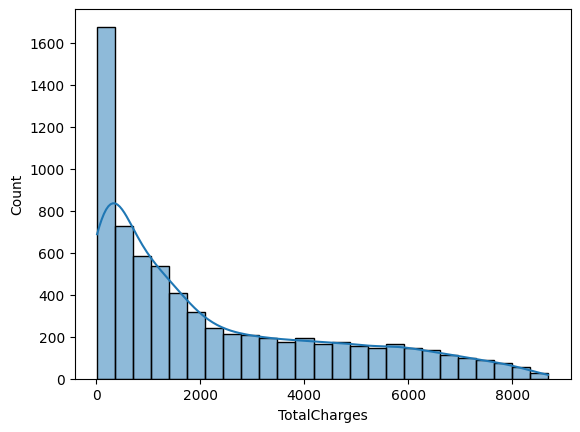

In [ ]:
#Check data distribution of the variable with missing data
sns.histplot(data=records, x='TotalCharges', kde=True)

<Axes: xlabel='TotalCharges'>

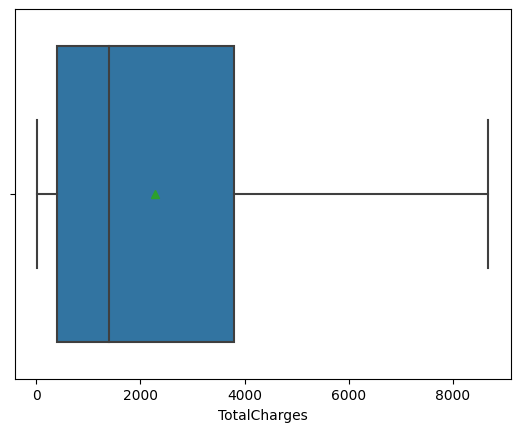

In [ ]:
#Write code to display a boxplot for x='TotalCharges'
sns.boxplot(data=records, x='TotalCharges', showmeans=True)

In [ ]:
#As the distribution is skewed, replace the missing values with median
records['TotalCharges'].fillna(records['TotalCharges'].median(),inplace=True)


**Question.** Alternatively you can drop the datapoints with missing Total Charges, why and why not?

records.dropna(subset=['TotalCharges'], axis = 0, inplace = True)

In [ ]:
# Remove customer IDs from the data set
records = records.drop(['customerID'], axis = 1)

### **EDA**

1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.

**Explore the relationships between the target variable and other variables, and explore the relationships among the non-target variables as well**

**Inspect target variable**

In [ ]:
#Inspect target variable
records.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

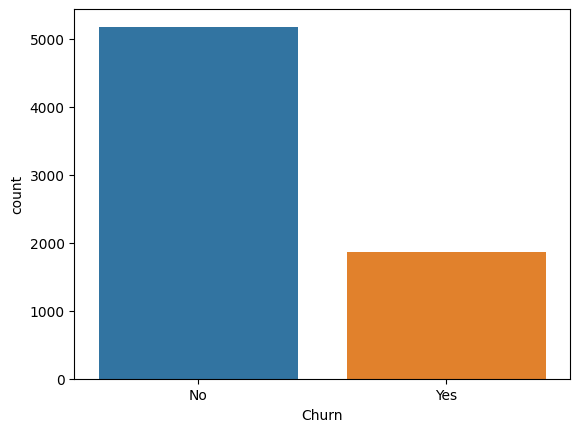

In [ ]:
sns.countplot(x=records['Churn'])

**Univariate analysis**

**Examine categorial variables**

gender :

Male      3555
Female    3488
Name: gender, dtype: int64




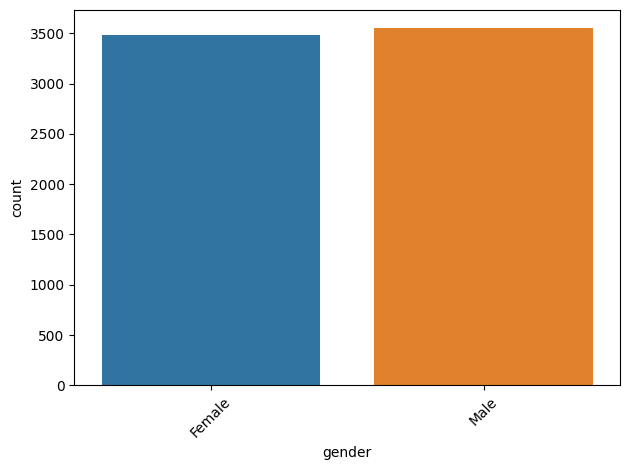

SeniorCitizen :

0    5901
1    1142
Name: SeniorCitizen, dtype: int64




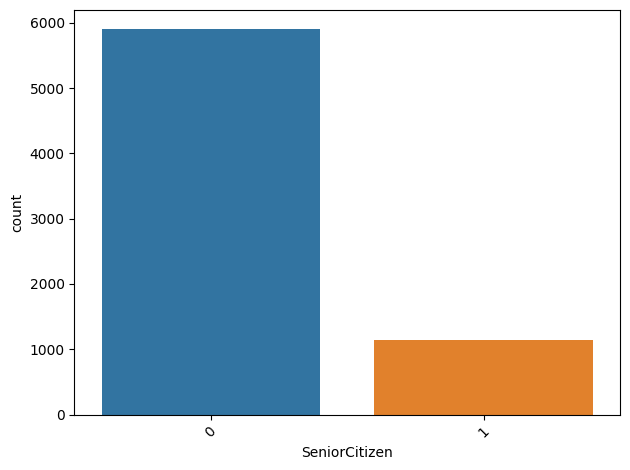

Dependents :

No     4933
Yes    2110
Name: Dependents, dtype: int64




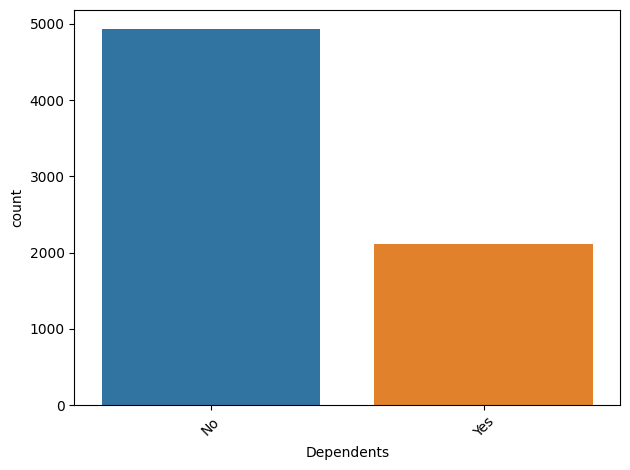

PhoneService :

Yes    6361
No      682
Name: PhoneService, dtype: int64




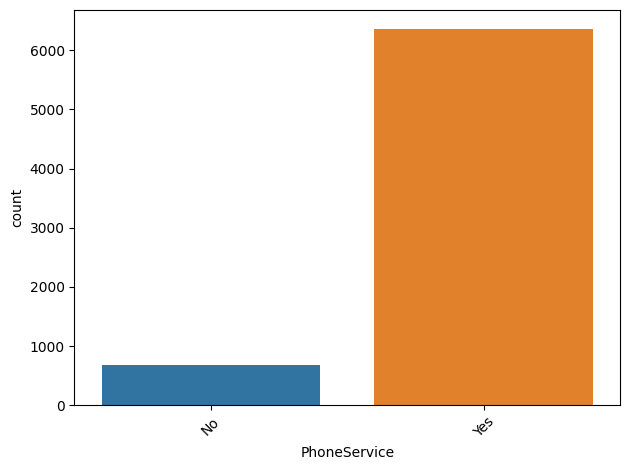

MultipleLines :

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64




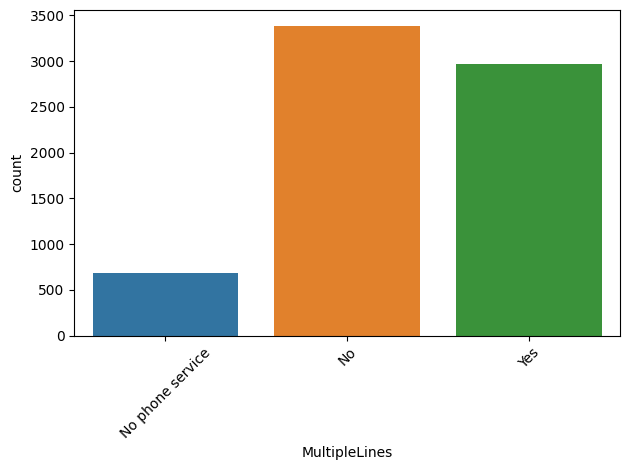

InternetService :

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64




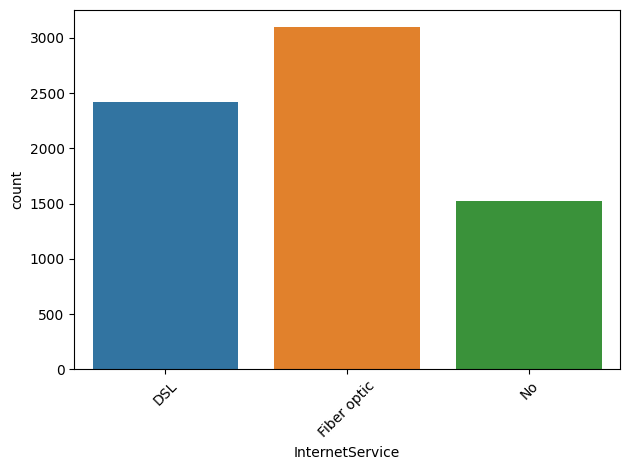

OnlineSecurity :

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64




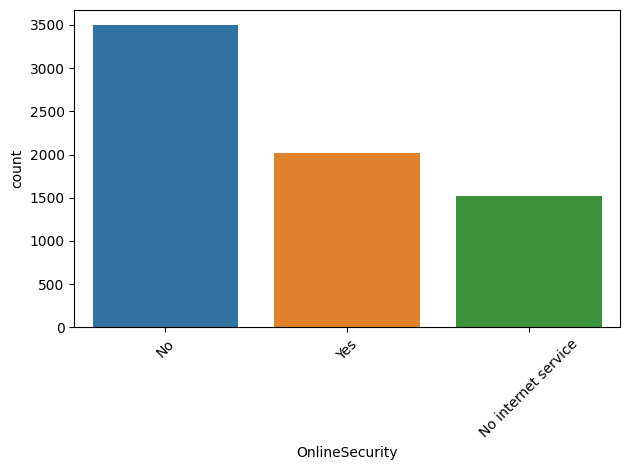

OnlineBackup :

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64




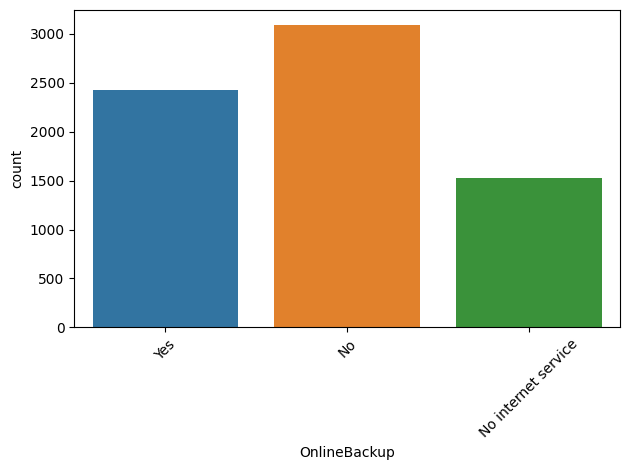

DeviceProtection :

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64




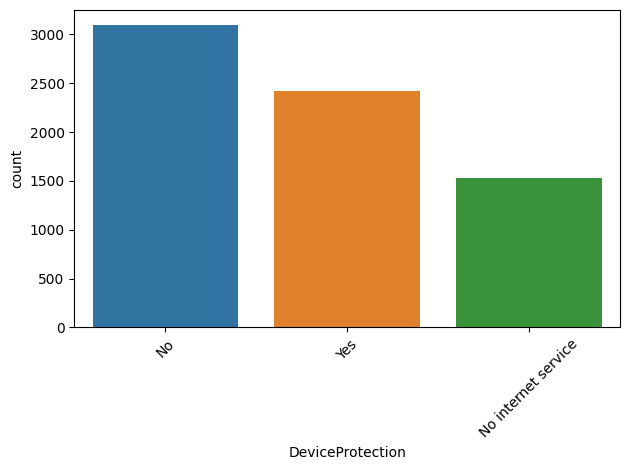

TechSupport :

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64




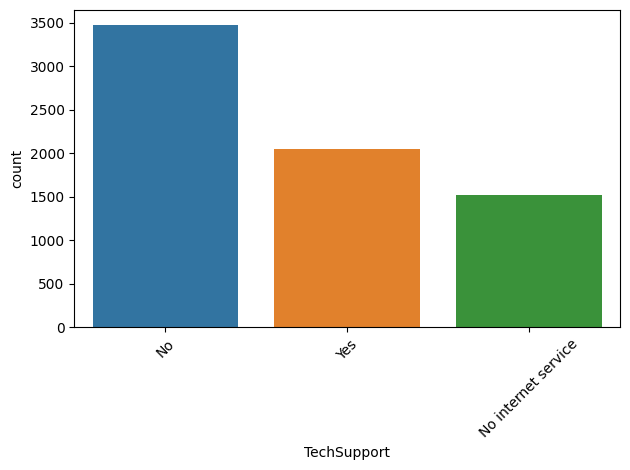

StreamingTV :

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64




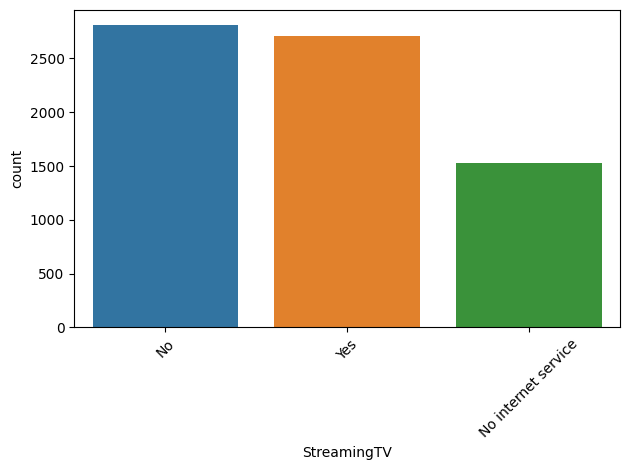

StreamingMovies :

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64




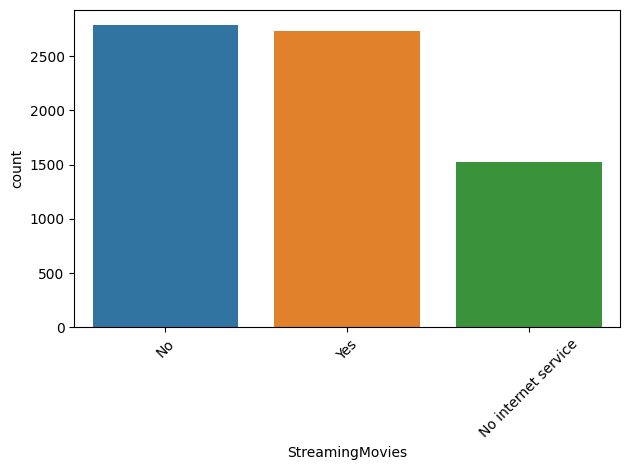

Contract :

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64




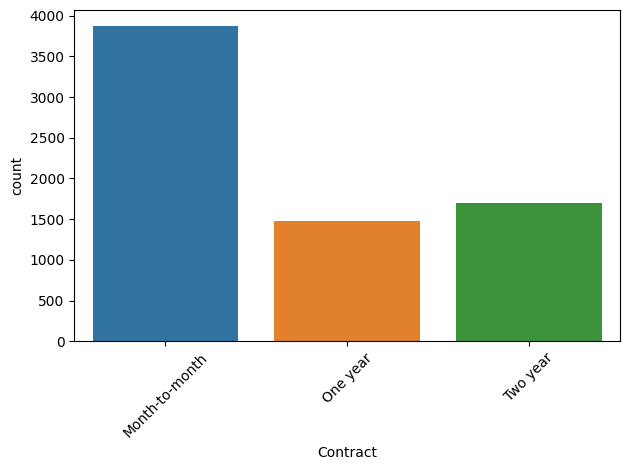

PaperlessBilling :

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64




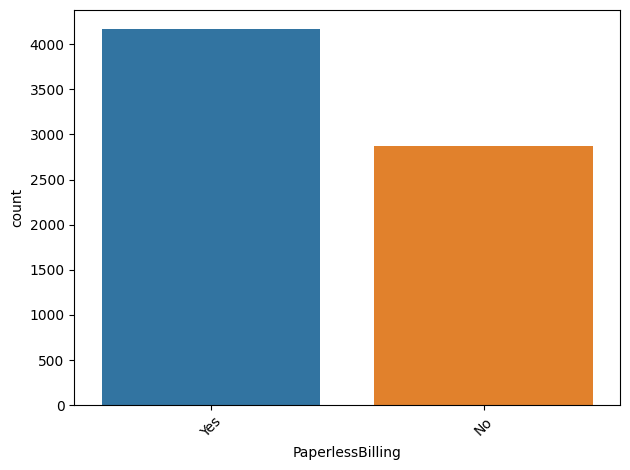

PaymentMethod :

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64




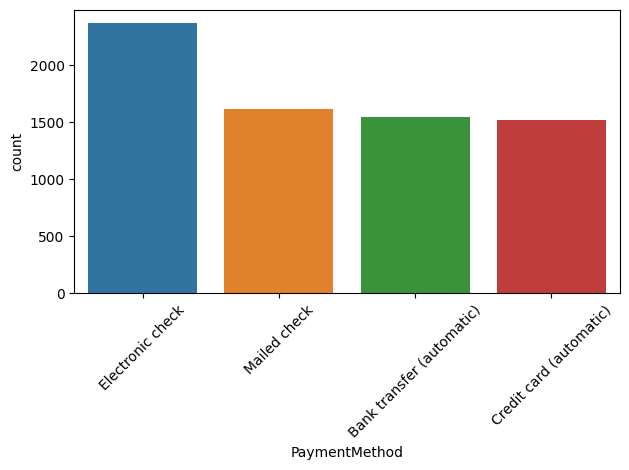

In [ ]:
#List the categorical variables and print value_counts and countplots
cats=['gender','SeniorCitizen', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   sns.countplot(x=records[i])
   # Rotate the x-labels by 45 degrees
   plt.xticks(rotation=45)

    # Optionally, you can adjust the labels further
   plt.tight_layout()
   plt.show()

**Examine numeric variables**

tenure :

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64




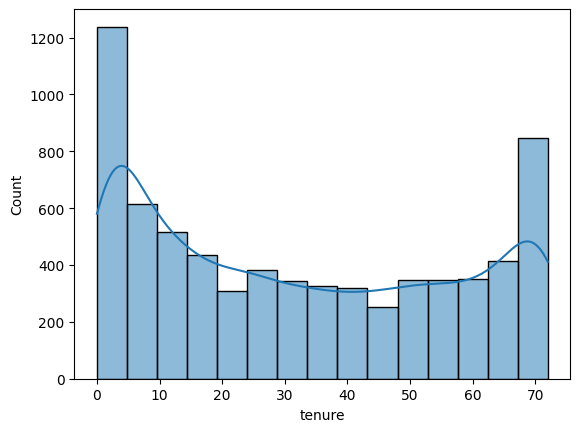

MonthlyCharges :

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64




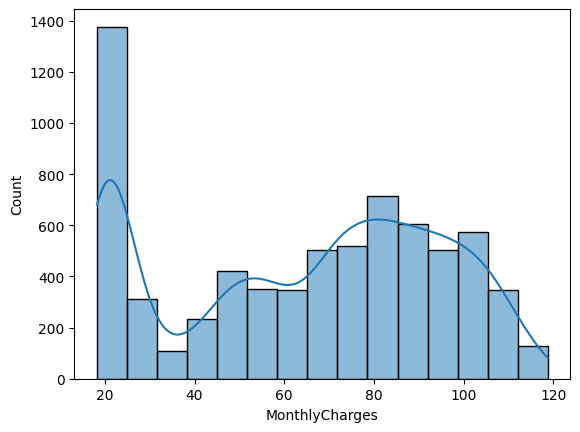

TotalCharges :

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64




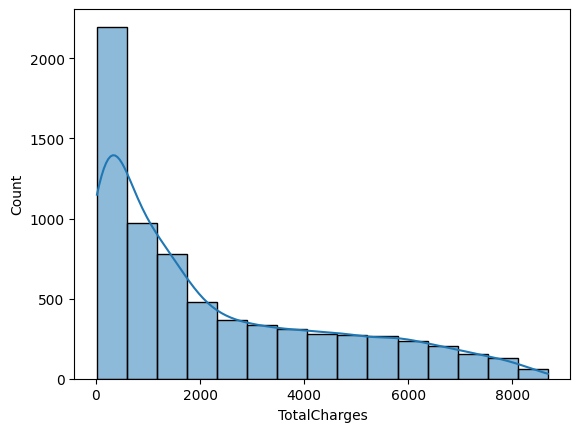

In [ ]:
nums=['tenure', 'MonthlyCharges', 'TotalCharges']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins = 15, kde=True)
   #sns.boxplot(x=records[i], showmeans=True)
   plt.show()


Note the ranges

**Explore binary relationships**

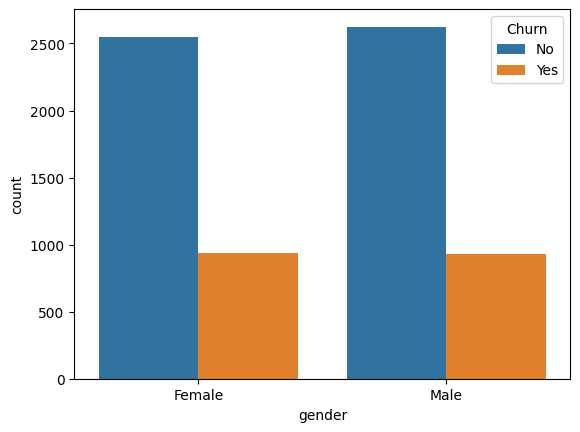

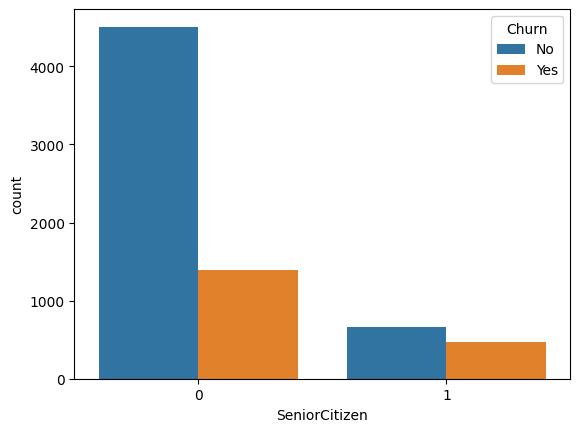

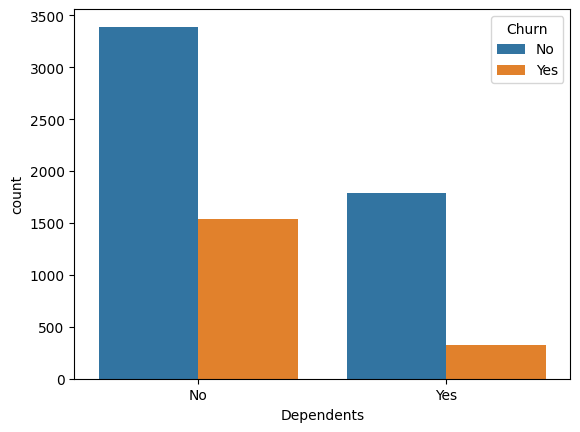

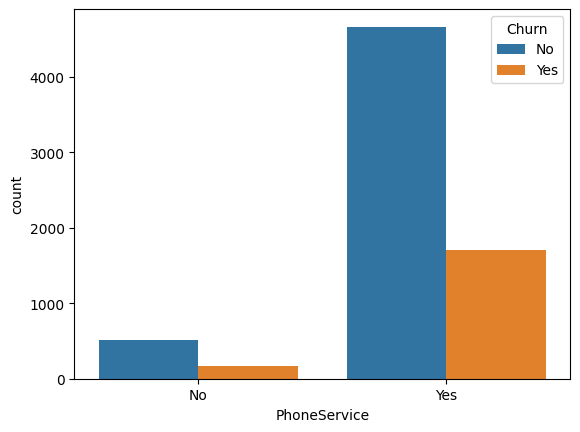

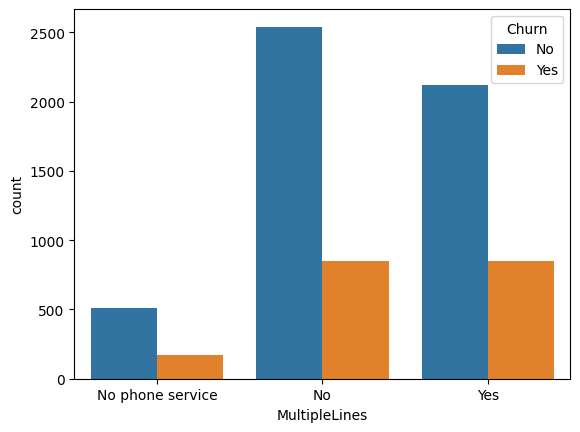

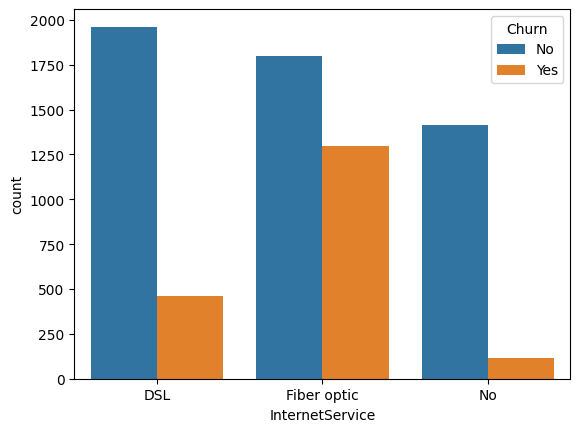

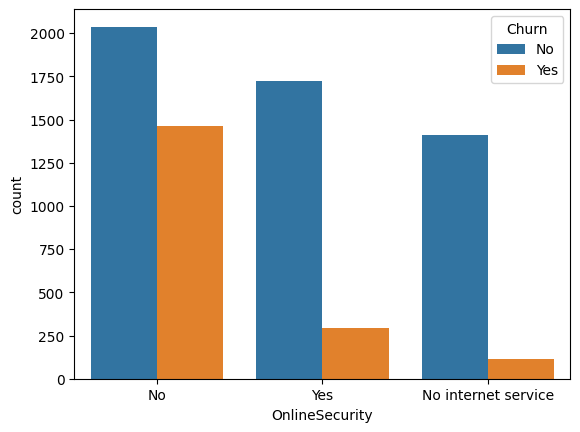

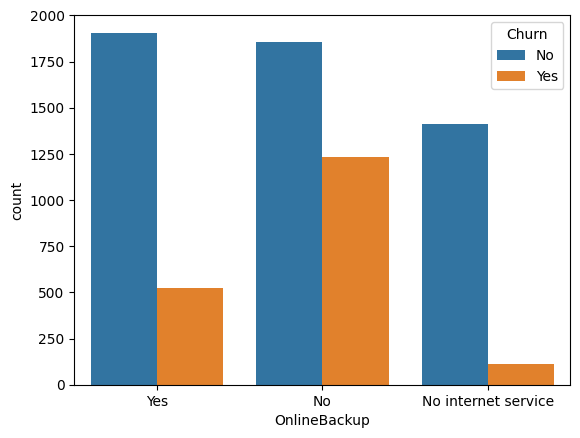

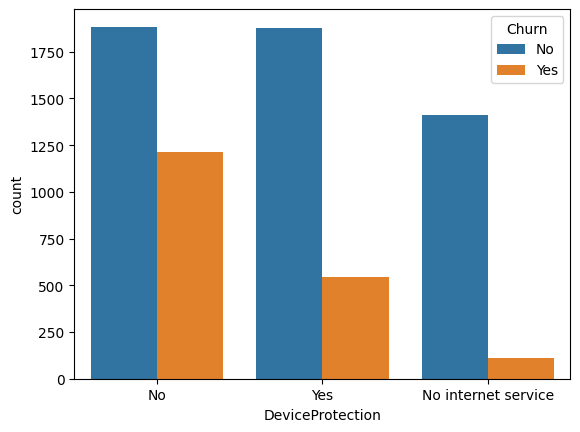

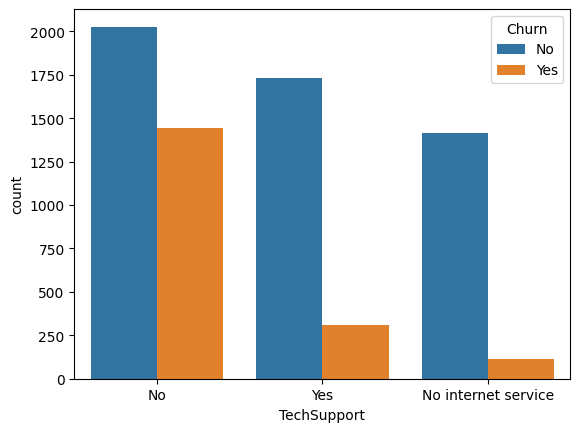

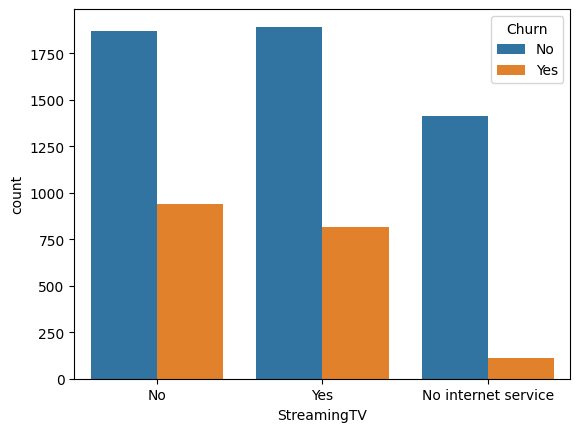

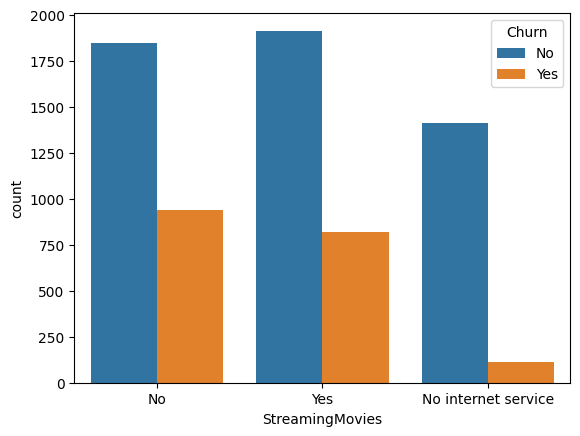

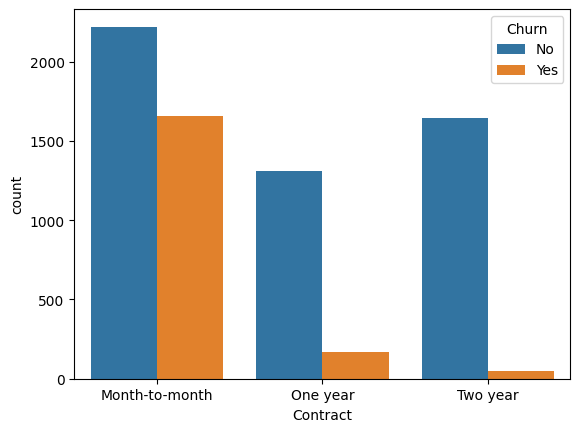

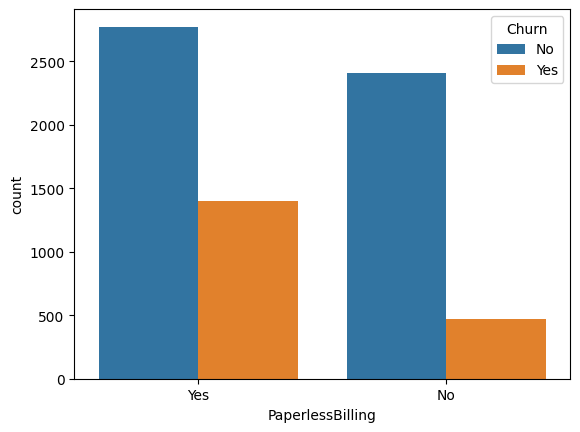

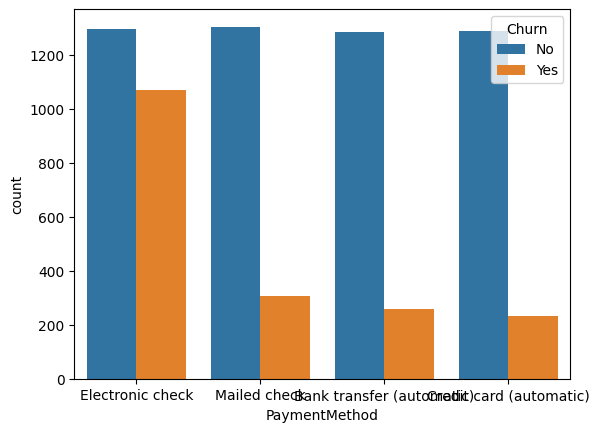

In [ ]:
#explore relationships between each categorical variable and the target one
for i in cats:
   plt.figure()
   sns.countplot(x=records[i], hue=records['Churn'])

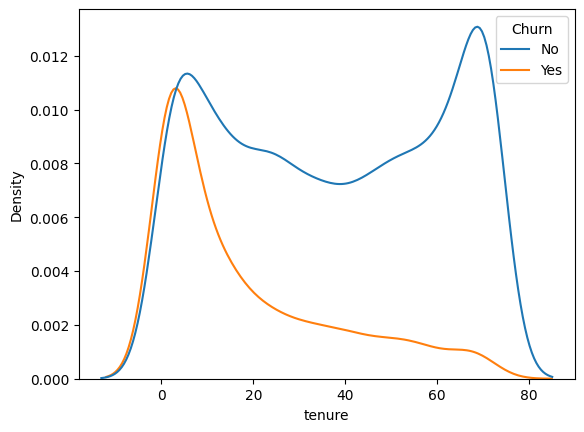

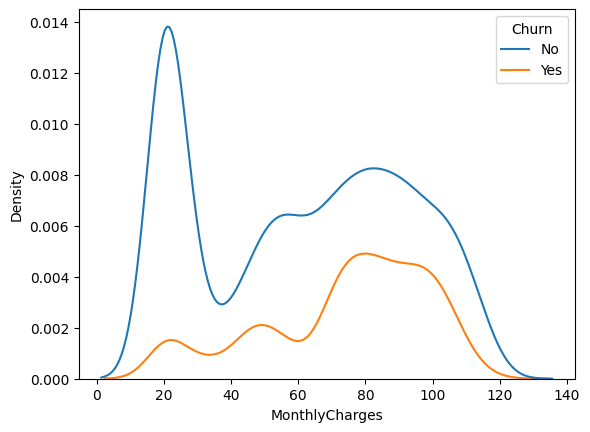

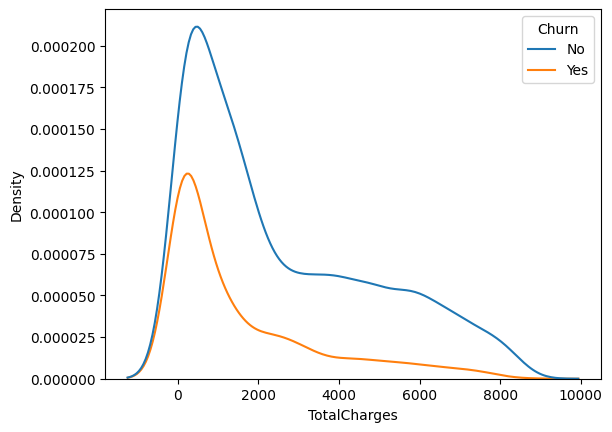

In [ ]:
#Explore  relationships between each numeric variable and the target
for i in nums:
  plt.figure()
  sns.kdeplot(data=records, x=i, hue='Churn')

You can explore relationships among the non-target variables.

**Multi-variate analysis**

<ipython-input-18-4326821b8740>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), annot=True, cmap='crest')


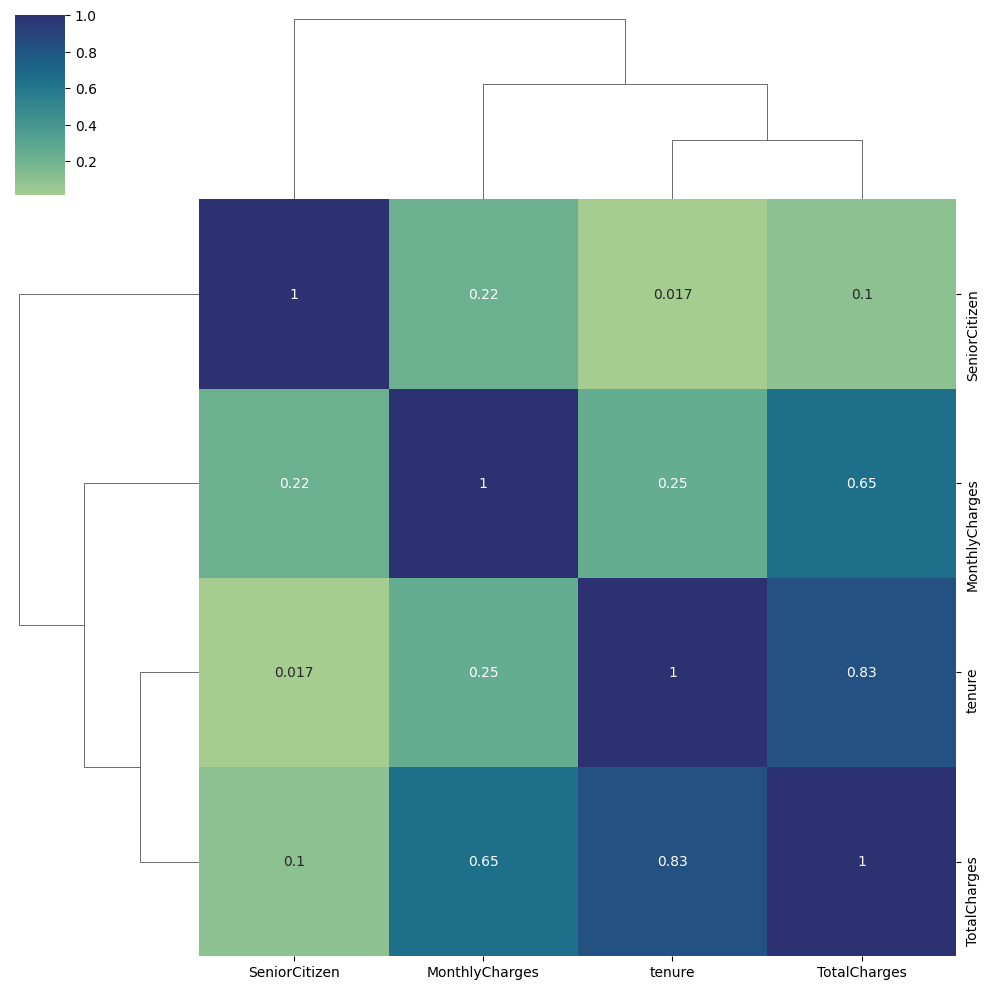

In [ ]:
#Write code to display a heatmap clustermap for data=records.corr(), cmap="Blues" or cmap='crest'


### **Data preparation**
* Data conversion
* Feature selection
* Target specification
* Data spliting
* Data scaling (X_train and X-test)

**Data conversation**

In [ ]:
#Write code to display the top 5 records, hint: use head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# List the categorical columns, on the assumption that they Nominal, are not Ordinal variables.
cat_columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=cat_columns, drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Contract                               7043 non-null   object 
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [ ]:
# Mapping ordinal variable Contract
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

# Apply the mapping to create a new column 'Contract_N'
records['Contract'] = records['Contract'].map(contract_mapping)


In [ ]:
records=records.rename(columns={'Churn_Yes':'Churn'})

In [ ]:
#Write code to display the following info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Contract                               7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

**Feature and target selection**

In [ ]:
#Define predictors and label
X=records.drop('Churn', axis=1)
y=records['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: uint8

**Data spliting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Write code to split the data into X_train, X_test, y_train, y_test Hint: use train_test_split(X, y, test_size=0.35, stratify = y, random_state=2023 )



**Data normalisation/scaling**

**Notes**

Algorithms such as decision tree regressors, random forests, and support vector regression are generally not very sensitive to differences in scale between the input variables and target variable.

However, algorithms such as linear regression and neural networks can be more sensitive to scale differences and may require normalization or standardization of the input variables and/or target variable.

It is a common practice not to scale the target variable (y_train and y_test) because it is not used as an input to the model during training or prediction.

If you scale the target variable (y_train and y_test), you would need to perform an inverse transformation on the predicted values to get them back to their original scale.

Scalling after data split so that the test data distribution does not affect the scaling of the training process

In [ ]:
#import scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## **2.3. KNN Classifier Model building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Import KNN classifier class
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Train a KNN model
k = 15 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, p=2)

# Fit the knn with scaled X_train and y_train
knn.fit(X_train_scaled, y_train)

# Write code to make predictions on the SCALED testing set



Note:

* If p = 1, the distance metric becomes the Manhattan distance (also known as the L1 norm).
* If p = 2, the distance metric becomes the Euclidean distance (also known as the L2 norm).

## **2.4. Performance Evaluation**
* Classification report
* Confusion matrix
* ROC and AUC

### **Classification report**

In [ ]:
# Print the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1371  181]
 [ 258  303]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



In [ ]:
#get predicted probabilities for the main class
y_pred_probs_norm = knn.predict_proba(X_test_scaled)
y_pred_probs_norm = y_pred_probs_norm[:, 1]
print(y_pred_probs_norm)

[0.33333333 0.13333333 0.6        ... 0.33333333 0.53333333 0.53333333]


### **ROC curve and AUC**

AUC: 0.823


<Axes: >

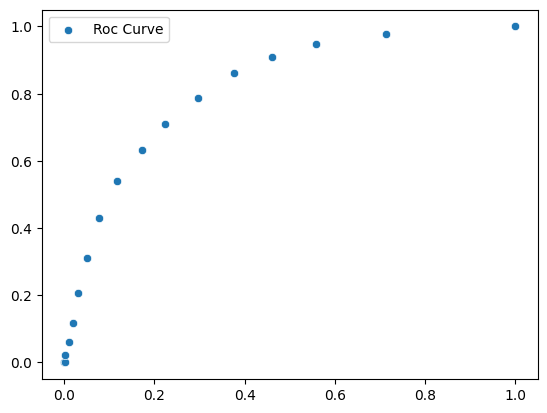

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_norm)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))
sns.scatterplot(x=fpr, y=tpr, label='Roc Curve')

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Probability':y_pred_probs_norm})
inspection.head(10)

,Actual,Predicted,Probability
4658,0,0,0.333333
2179,0,0,0.133333
4286,0,1,0.600000
2752,1,0,0.133333
3845,1,0,0.466667
1863,0,0,0.066667
2011,0,0,0.133333
5196,0,0,0.266667
1274,0,0,0.200000
459,0,1,0.800000


### **Find the best threshold**
Find the best threshold using the thresholds in ROC curve

In [ ]:
#In the previous lab we learned to optimise the threshold based on the accuracy score
from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    accuracy.append(accuracy_score(y_test, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

0.6


In [ ]:
#However, in imbalanced class classification, we may consider f1_score or recall
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.4


In [ ]:
#get predicted probabilities for best threshold
y_pred_best = (y_pred_probs_norm >= best_threshold).astype(bool)

print(y_pred_best)



[False False  True ... False  True  True]


In [ ]:
#Write code to print confusion matrix and classification_report for the best threshold
#Hint: using y_pred_best



[[1205  347]
 [ 162  399]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1552
           1       0.53      0.71      0.61       561

    accuracy                           0.76      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.79      0.76      0.77      2113



In [ ]:
#Write code to print confusion matrix and classification_report for y_pred
#Hint: use y_pred



[[1371  181]
 [ 258  303]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



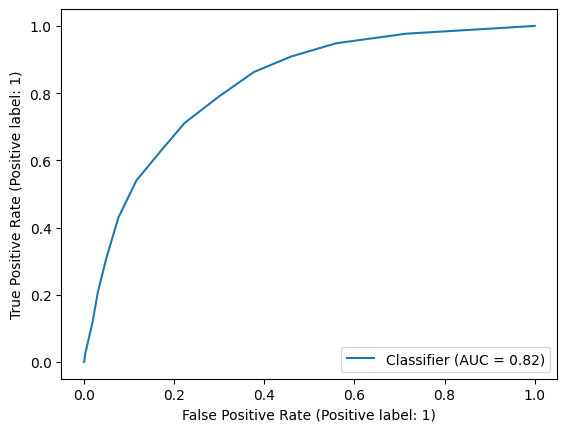

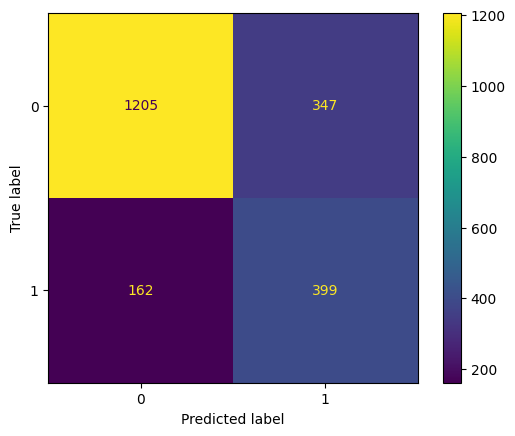

In [ ]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs_norm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()


You can plot the best_threshold to visualise it

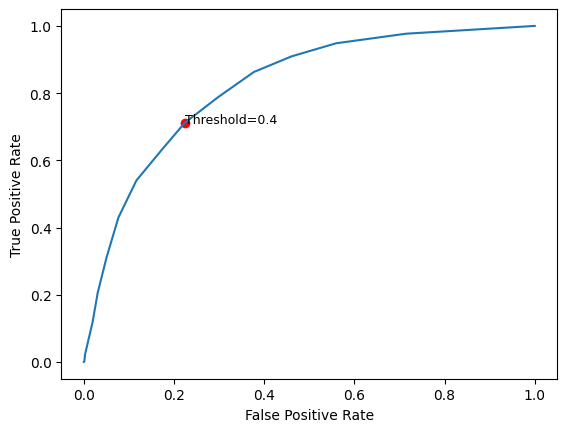

In [ ]:
# Compute the ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_probs_norm)

# Find the index of the threshold that corresponds to the best threshold
best_threshold_idx = (abs(roc_thresholds - best_threshold)).argmin()

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.scatter(fpr[best_threshold_idx], tpr[best_threshold_idx], color='red') # Mark the best threshold
plt.text(fpr[best_threshold_idx], tpr[best_threshold_idx], f'Threshold={best_threshold}', fontsize=9)
plt.show()

### **Model comparision**

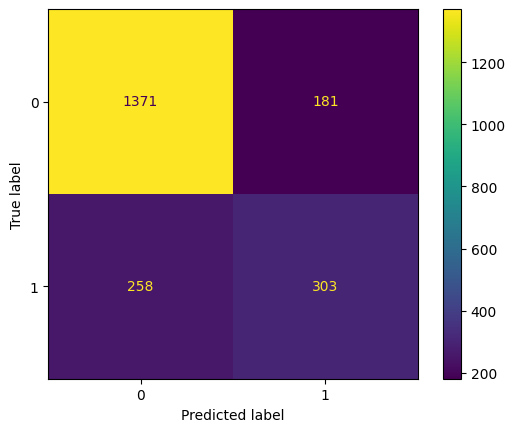

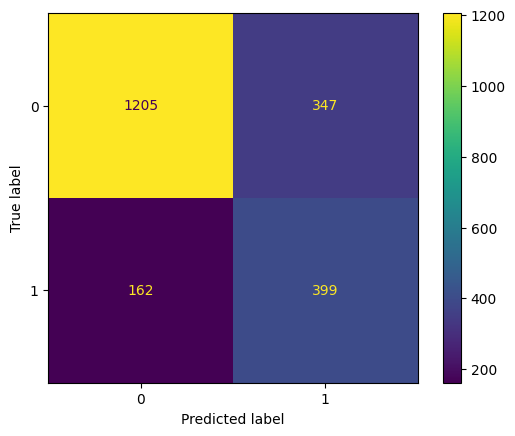

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()

In [ ]:
#First model evaluation
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ", '%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))


Accuracy:  0.792
Precision:  0.626
Recall:  0.540
F1:  0.580


In [ ]:
#Write code to print the same metrics for y_pred_best - i.e. the second model






Accuracy:  0.759
Precision:  0.535
Recall:  0.711
F1:  0.611


## **2.5. Optimising k**
**Optimise k based on accuracy**

Best k value: 22
Best accuracy: 0.802
F1 score for best accuracy: 0.579


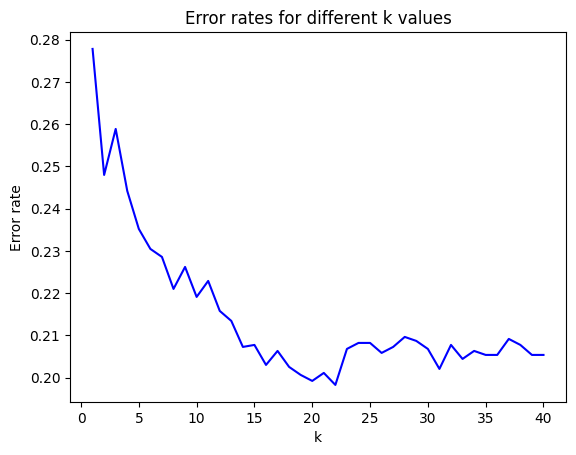

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
best_f1=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k=knn.predict(X_test_scaled)
    accuracy = knn.score(X_test_scaled, y_test)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_f1 = metrics.f1_score(y_test, y_pred_k)

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")
print(f"F1 score for best accuracy: {best_f1:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

**Optimise k based on f1_score**

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values
best_k=0
best_f1=0
best_accuracy=0
f1_scores = []
f1 = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k=knn.predict(X_test_scaled)
    f1 = metrics.f1_score(y_test, y_pred_k)
    f1_scores.append(f1)
    accuracy_k=metrics.accuracy_score(y_test, y_pred_k)
    if ((f1 > best_f1) ):
        best_k = k
        best_f1 = f1
        best_accuracy = metrics.accuracy_score(y_test,y_pred_k)

# Find the best k value with highest f1 score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"Accuracy for Best F1 score: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('F1 scores for different k values')
plt.plot(k_values, f1_scores, color='blue', label='F1 Scores')
plt.plot(k_values, error_rates, color='red', label='error_rates')
plt.legend()
plt.show()

**Try it yourself!**

* Rebuild the model with the optimal k
* Evaluate the model

## **Optional: KNNImputer**

KNNImputer looks at the K nearest neighboring data points that have complete information for a variable with missing and takes an average (or median) of those values to fill in the missing value. The value of K is specified by the user as a hyperparameter.

from sklearn.impute import KNNImputer

**Impute missing data using KNN imputation**

imputer = KNNImputer(n_neighbors=5)

records[['TotalCharges_imputed']] = imputer.fit_transform(records[['TotalCharges']])

**Try it the above code yourself, you need to reload data and follow the whole process again**

Note: KNNImputer cannot be directly applied to categorical data.


# **3. Case Two: Insurance Premium Estimation**

**KNN regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?

## **3.1 Loading data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'


In [ ]:
#loading data
records = pd.read_csv(url)

records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **3.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   dependants  1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Inspect missing data
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


### **EDA**

* Analyse and visualise each variable
* Any strong correlation from the dataset?  
* How to deal with categorical features?

**Inspect the target variable**

In [ ]:
records.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

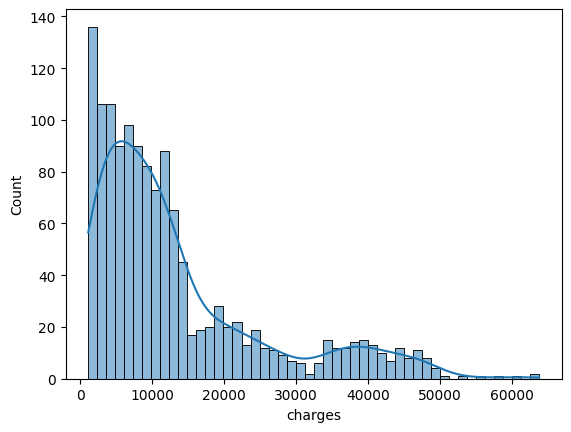

In [ ]:
sns.histplot(data=records, x='charges', bins=50, kde=True)

<Axes: xlabel='charges'>

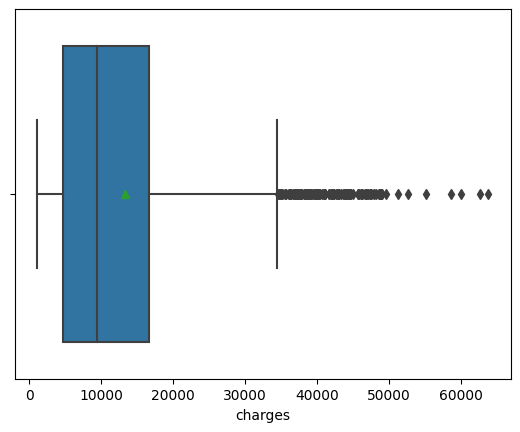

In [ ]:
sns.boxplot(data=records, x='charges', showmeans=True)

**Univariate analysis**

In [ ]:
records.describe()

,age,bmi,dependants,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


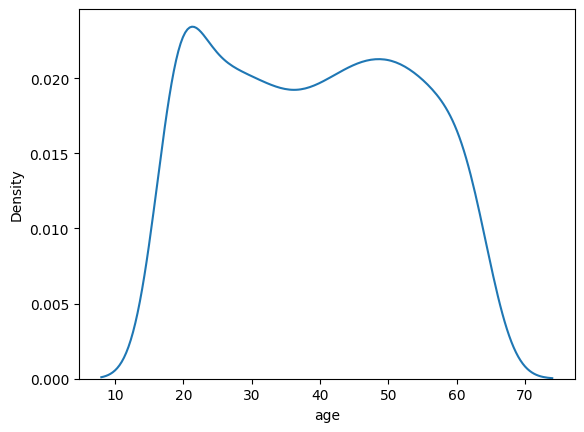

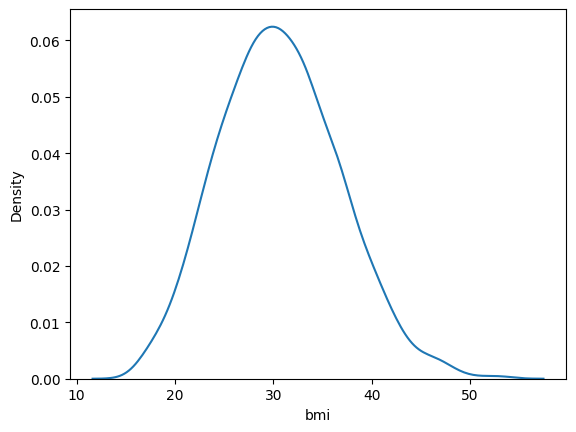

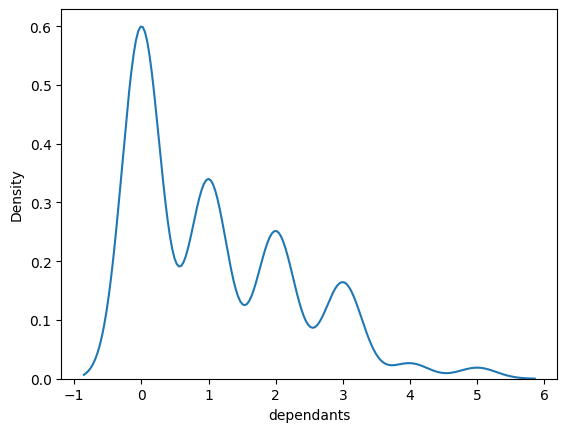

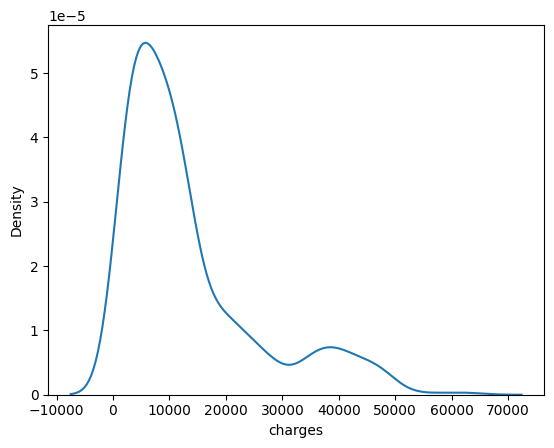

In [ ]:
nums=['age','bmi', 'dependants', 'charges']
for i in nums:
  plt.figure()
  sns.kdeplot(data=records, x=i)

Sometimes due to the effect of kernel smoothing, you see negative values of x, but it may not be the case.

<Figure size 640x480 with 0 Axes>

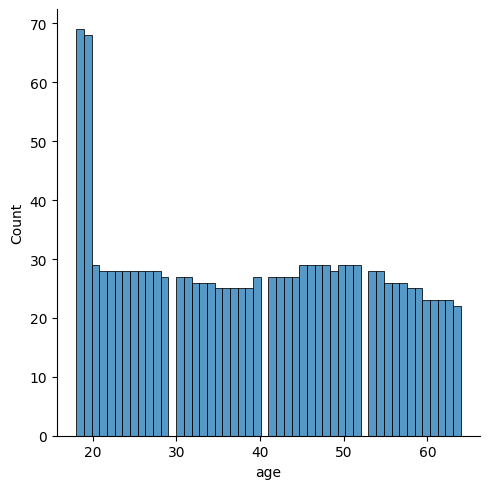

<Figure size 640x480 with 0 Axes>

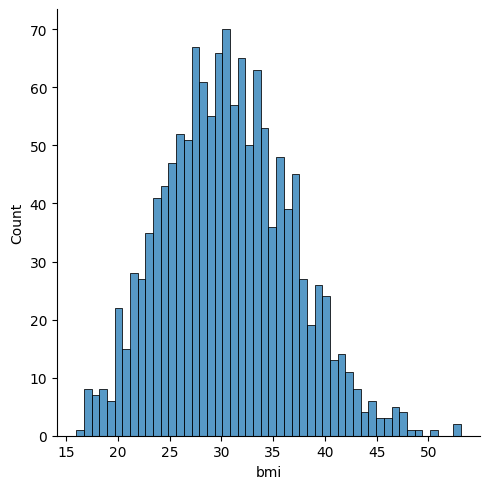

<Figure size 640x480 with 0 Axes>

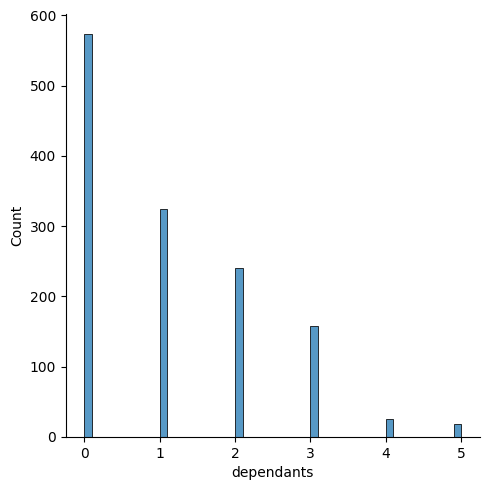

<Figure size 640x480 with 0 Axes>

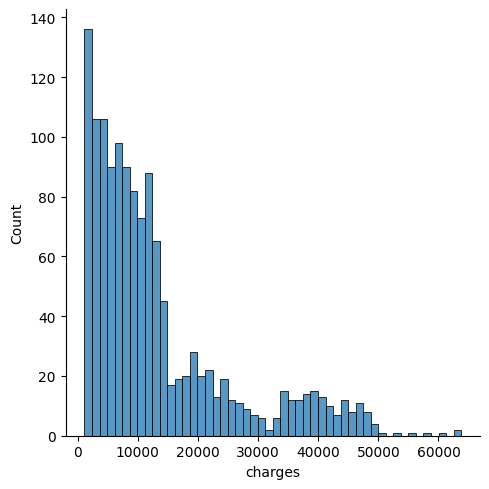

In [ ]:
for i in nums:
  plt.figure()
  sns.displot(data=records, x=i, bins=50)

sex :

male      676
female    662
Name: sex, dtype: int64




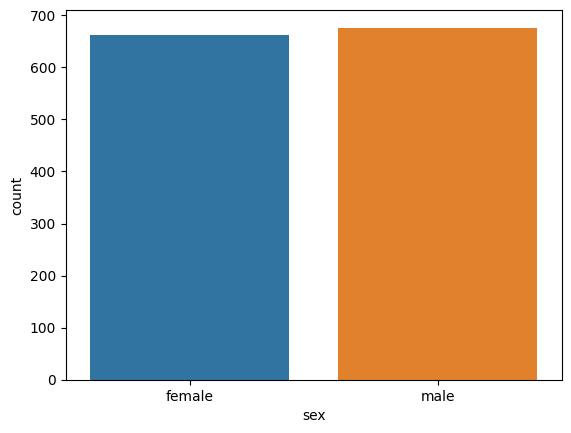

smoker :

no     1064
yes     274
Name: smoker, dtype: int64




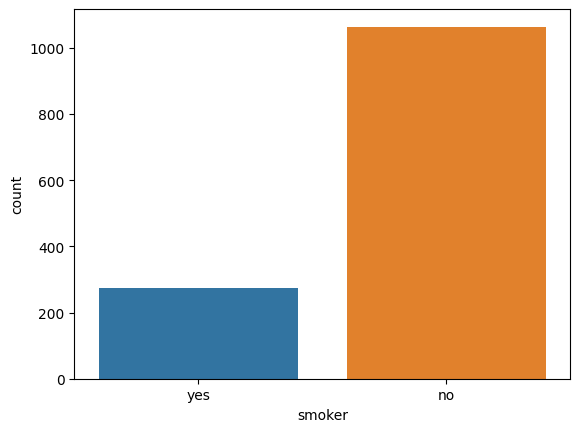

region :

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64




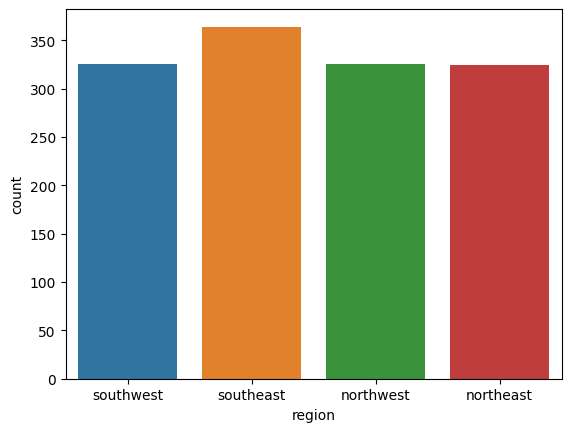

dependants :

0    574
1    324
2    240
3    157
4     25
5     18
Name: dependants, dtype: int64




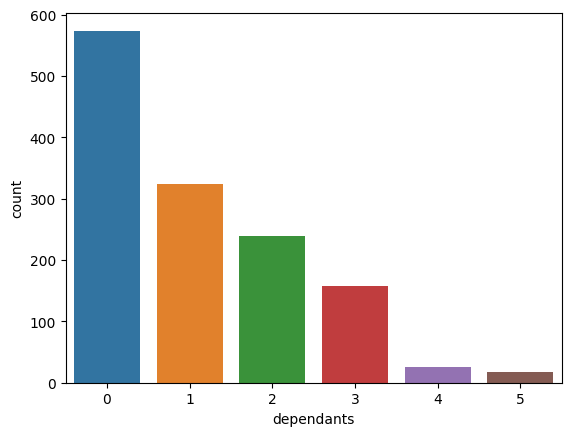

In [ ]:
cats=['sex','smoker', 'region', 'dependants']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   sns.countplot(data=records, x=i)
   plt.show()

**Bivariabe analysis**

Between numeric variables

<Axes: xlabel='age', ylabel='charges'>

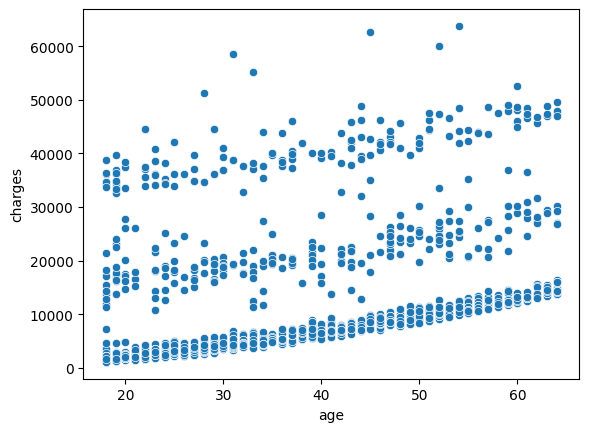

In [ ]:
sns.scatterplot(data=records, x='age', y='charges')

<Axes: xlabel='bmi', ylabel='charges'>

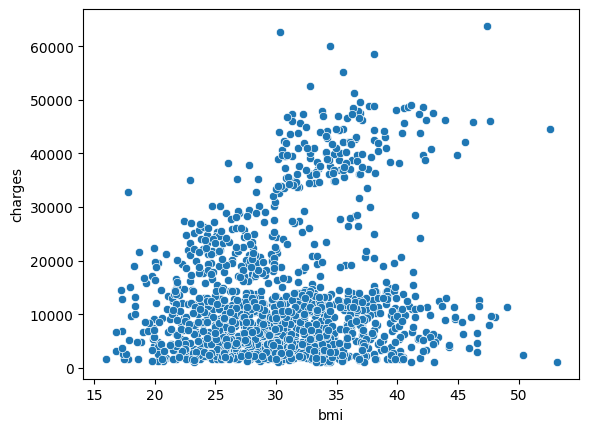

In [ ]:
sns.scatterplot(data=records, x='bmi', y='charges')

Between one numeric and one categorical variables

<Axes: xlabel='charges', ylabel='Density'>

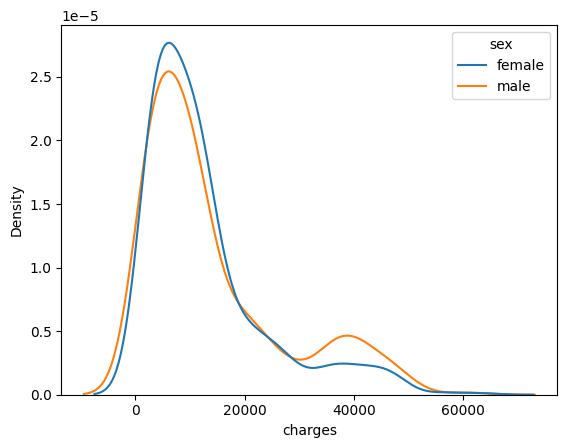

In [ ]:
sns.kdeplot(data=records, x='charges', hue='sex')

<Axes: xlabel='charges', ylabel='sex'>

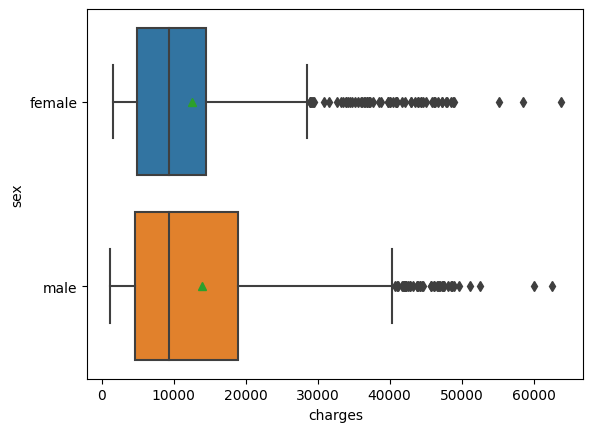

In [ ]:
#Explore relationship between charges and sex
sns.boxplot(data=records, x='charges', y='sex', showmeans=True)

<Axes: xlabel='charges', ylabel='smoker'>

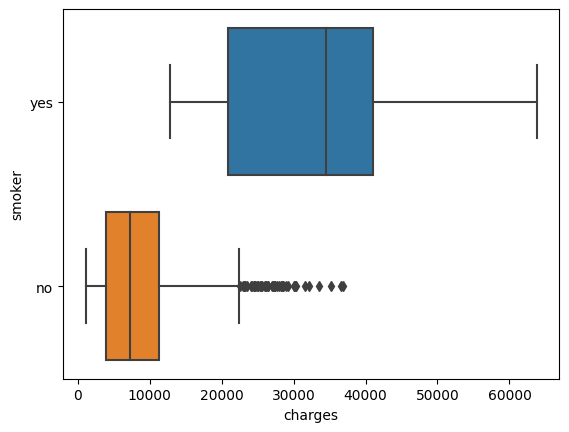

In [ ]:
#Write code to explore relationship between charges and smoker



<Axes: xlabel='charges', ylabel='region'>

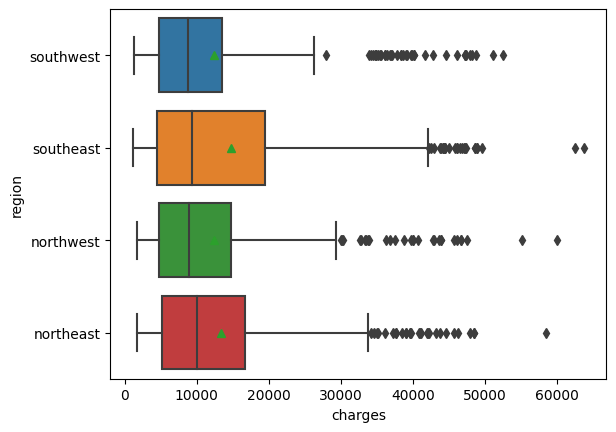

In [ ]:
#Write code to explore relationship between charges and region




<Axes: xlabel='dependants', ylabel='charges'>

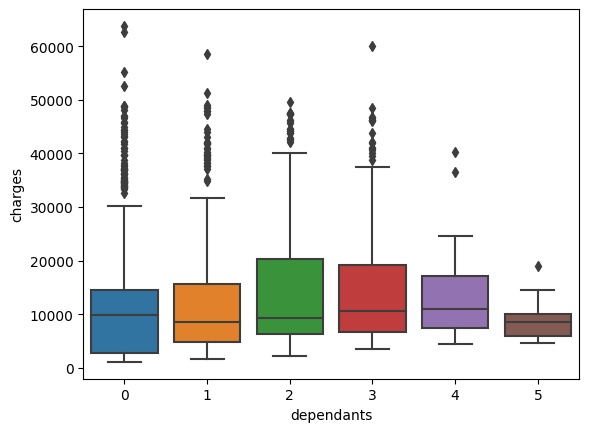

In [ ]:
#Write code to explore relationship between charges and dependants, y='charges', x='dependants'



**You can explore relationships among non-target variables**

For example

<Axes: xlabel='age', ylabel='smoker'>

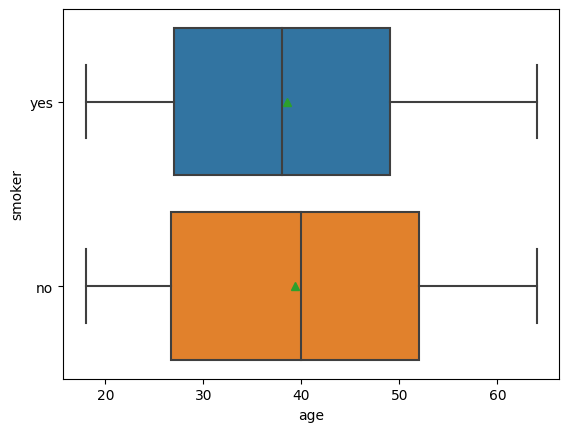

In [ ]:
sns.boxplot(data=records, x='age', y='smoker', showmeans=True)

<Axes: xlabel='sex', ylabel='bmi'>

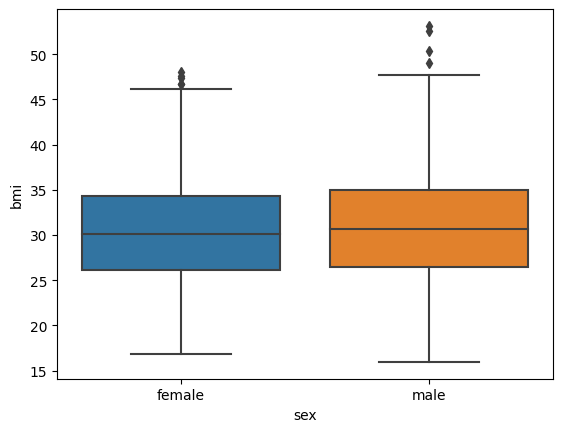

In [ ]:
sns.boxplot(data=records, y='bmi', x='sex')

**Multi-variate analysis**

<Axes: xlabel='age', ylabel='charges'>

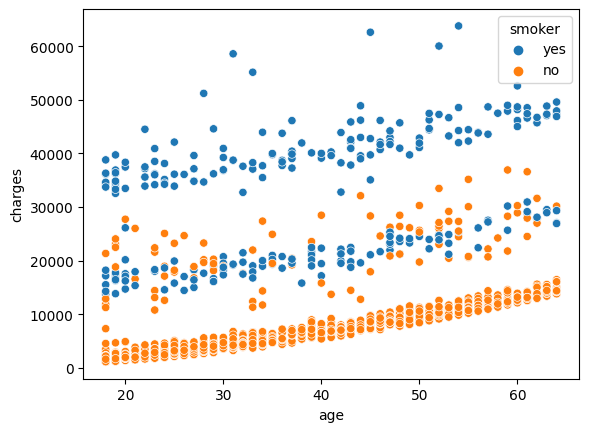

In [ ]:
sns.scatterplot(data=records, x='age', y='charges', hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

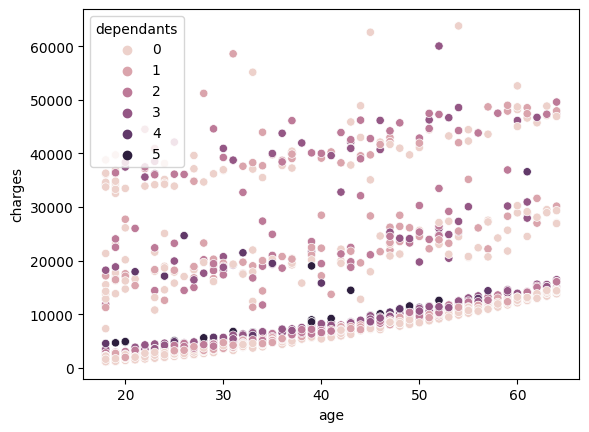

In [ ]:
sns.scatterplot(data=records, x='age', y='charges', hue='dependants')

<ipython-input-70-551c9746ebff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)


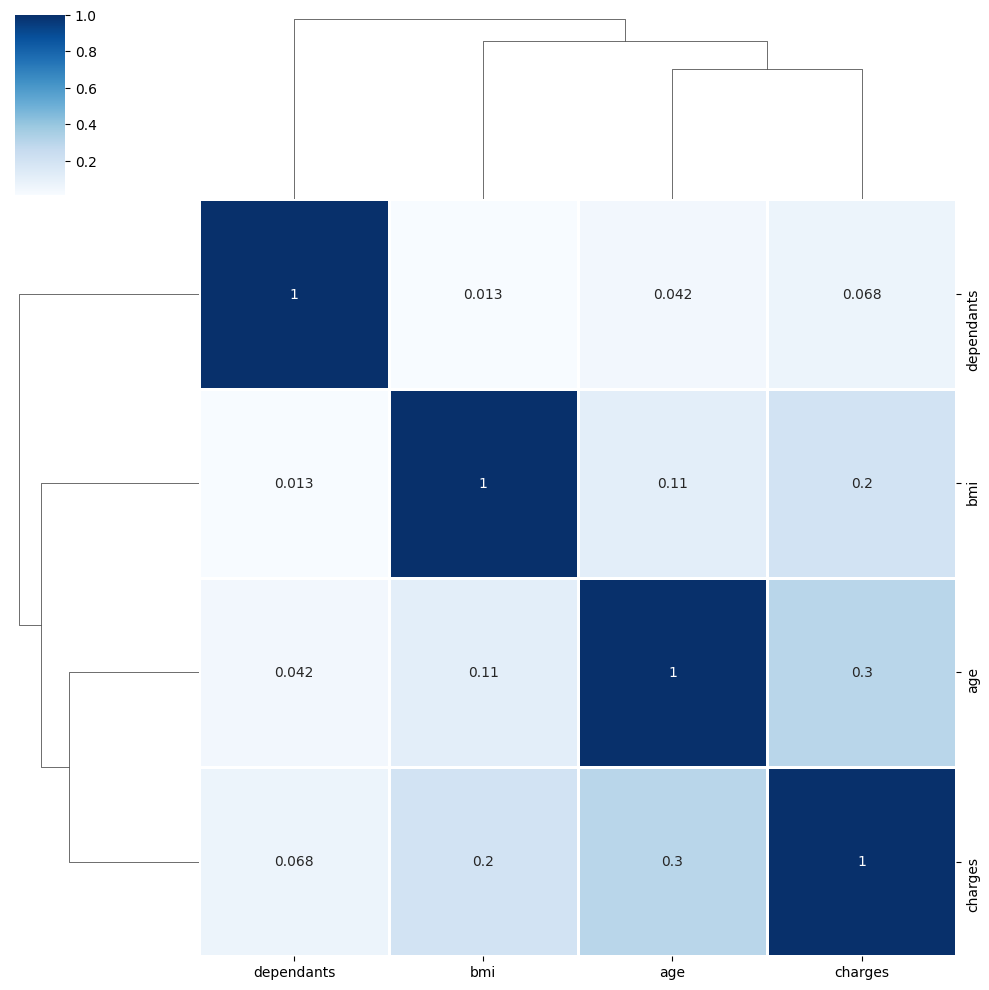

In [ ]:
#visualise clustermap
sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)

### **Data preparation**
* Data conversion
* Feature selection: X
* Target specification: y
* Scale data
* Data spliting: X_train, X_test, y_train, y_test

In [ ]:
records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=['sex', 'region'], drop_first=True)


In [ ]:
#convert categorical data to numerical
def coding_smoking(x):
    if x=='yes': return 1
    if x=='no': return 0

records['smoker'] = records['smoker'].apply(coding_smoking)

In [ ]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   dependants        1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   charges           1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB
None


In [ ]:
X=records.drop('charges', axis=1)
y=records['charges']

In [ ]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

We don't often scale the target variable (y_train and y_test) in regression problems because it is not used as an input to the model during training or prediction. If models are sensitive to scale (eg linear regression) then it is good to scale y as well.

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## **3.3. KNN Model building**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Create a KNN regressor object
k=5
knn = KNeighborsRegressor(k)

# Write code to fit the model to the SCALED training data



KNeighborsRegressor()

In [ ]:
# Write code to predict the charges for the SCALED testing data



## **3.4. Performance Evaluation**
* Root Mean Squared Error (RMSE)measures the differences between predicted and actual values of the target variable.

* Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

* R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination.

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection.head()

,Actual,Predicted
748,8556.90700,8490.840800
745,9910.35985,13007.466250
57,34303.16720,33060.069840
546,3268.84665,7279.783470
279,9855.13140,12867.763276


In [ ]:
# Calculate performance metrics for the first model
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_1 = r2_score(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)

# Print performance metrics for the first model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 5349.672
R Squared: 0.809
Absolute Squared Error: 3251.695


In [ ]:
records.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
#run the below if you have problem with 'str' object is not callable - some variable is taken a built in function
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

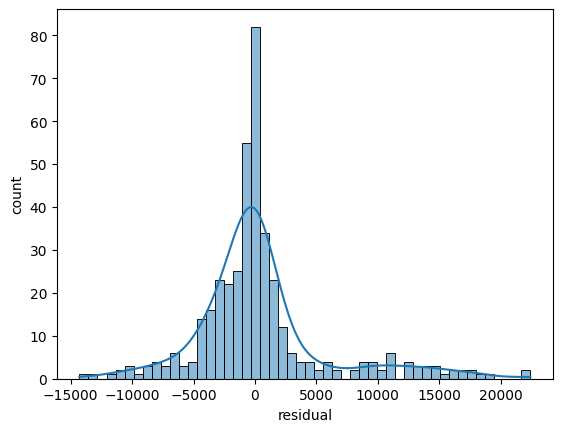

In [ ]:
# Plot residuals, i.e. the differences between the actual and predicted values.
sns.histplot(x=y_test-y_pred, bins=50, kde=True)
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

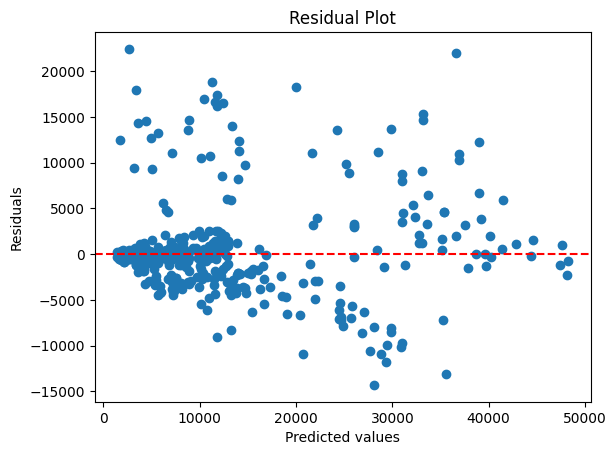

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred, y_test-y_pred)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

## **3.5. Optimising k**
based on rmse

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values

best_k=5
best_rmse=5400
error_rates=[]
for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, y_train)
    y_pred=knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    error_rates.append(rmse)
    if rmse <= best_rmse:
        best_k = k
        best_rmse = rmse

# Find the best k value with highest accuracy score
print(f"Best k value: {best_k}")
print(f"Best rmse: {best_rmse:.3f}")


Best k value: 6
Best rmse: 5260.340


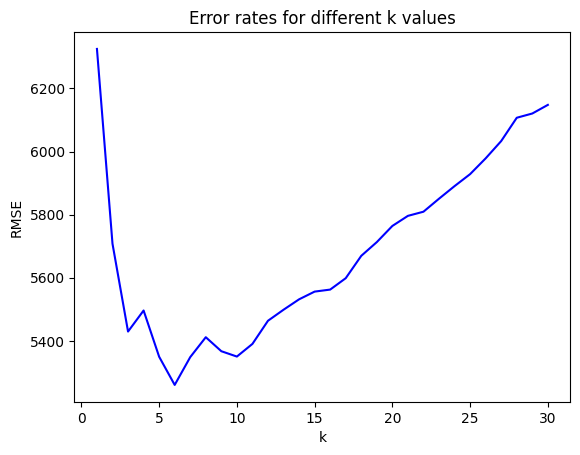

In [ ]:
# Plot k values against accuracy scores
plt.ylabel('RMSE')
plt.xlabel('k')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

### **Model comparision**

* Rebuild the model with the optimal k
* Evaluate the model

In [ ]:
# Create a KNN regressor object
k=6
knn = KNeighborsRegressor(k)

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=6)

In [ ]:
# Predict the house prices for the testing data
y_pred_best = knn.predict(X_test_scaled)

In [ ]:
# Calculate performance metrics for the SECOND model
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_2 = r2_score(y_test, y_pred_best)
mae_2 = mean_absolute_error(y_test, y_pred_best)

In [ ]:
# Print performance metrics for the SECOND model
print("Root Mean Squared Error: {:.3f}".format(rmse_2))
print("R Squared: {:.3f}".format(r2_2))
print("Absolute Squared Error: {:.3f}".format(mae_2))

Root Mean Squared Error: 5260.340
R Squared: 0.816
Absolute Squared Error: 3235.391


In [ ]:
# Write code to print performance metrics for the FIRST model





Root Mean Squared Error: 5349.672
R Squared: 0.809
Absolute Squared Error: 3251.695


# **4. Do it yourself**

Now practise what you have learned in this topic with previous datasets that you are familiar with, such as the Titanic, Biopsy and House Price datasets
